# DSO105 Intermediate Stats L5 Page 4 Activity

Using the breakfast data from last page, determine whether weight changes from baseline to follow up. 

In [1]:
## packages
library(tidyverse)
library(rcompanion)
library(car)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




In [2]:
## data
data = read.csv('../../datasets/breakfast.csv')

In [3]:
head(data)

,Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,Baseline.Body.Mass..kg.,Follow.Up.Body.Mass..kg.,Baseline.Lean.Tissue.Mass..kg.,Follow.Up.Lean.Tissue.Mass..kg.,Baseline.Adipose.Tissue.Mass..kg.,...,Week.1.Mean.Afternoon.Evening.Interstitial.Glucose..mmol.l.,Week.6.Mean.Afternoon.Evening.Interstitial.Glucose..mmol.l.,Week.1.CV.Afternoon.Evening.Interstitial.Glucose....,Week.6.CV.Afternoon.Evening.Interstitial.Glucose....,Week.1.Peak.Sleeping.Interstitial.Glucose..mmol.l.,Week.6.Peak.Sleeping.Interstitial.Glucose..mmol.l.,Week.1.Mean.Sleeping.Interstitial.Glucose..mmol.l.,Week.6.Mean.Sleeping.Interstitial.Glucose..mmol.l.,Week.1.CV.Sleeping.Interstitial.Glucose....,Week.6.CV.Sleeping.Interstitial.Glucose....
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,Fasting,27,Female,1.75,71.5,71.1,51.8,52.4,15.1,...,5.5,5.2,13.8,14.7,6.5,7.8,5.2,5.6,9.0,15.7
2,4,Fasting,25,Female,1.72,74.6,73.8,50.4,51.7,21.0,...,5.7,5.8,9.0,11.0,6.3,6.8,5.6,5.6,6.9,9.1
3,11,Fasting,44,Male,1.64,68.0,68.1,46.7,47.0,17.9,...,5.7,5.4,17.4,12.6,7.1,7.5,5.6,5.5,11.6,13.1
4,14,Fasting,36,Female,1.68,57.0,57.3,41.0,41.9,13.6,...,5.2,5.2,16.7,16.4,7.3,7.7,5.2,5.5,11.0,10.1
5,16,Fasting,28,Female,1.64,49.4,49.0,36.4,35.9,10.1,...,4.7,5.1,12.7,15.6,6.2,9.4,4.9,5.3,9.2,17.7
6,19,Fasting,38,Male,1.74,64.3,64.0,50.0,49.3,11.1,...,5.3,5.5,19.8,14.7,6.8,6.9,4.9,5.4,15.8,8.7


## Data Wrangling

In [4]:
data1 = data[1:33,]
## subset the void rows below 33

In [5]:
head(data1)
## view data

,Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,Baseline.Body.Mass..kg.,Follow.Up.Body.Mass..kg.,Baseline.Lean.Tissue.Mass..kg.,Follow.Up.Lean.Tissue.Mass..kg.,Baseline.Adipose.Tissue.Mass..kg.,...,Week.1.Mean.Afternoon.Evening.Interstitial.Glucose..mmol.l.,Week.6.Mean.Afternoon.Evening.Interstitial.Glucose..mmol.l.,Week.1.CV.Afternoon.Evening.Interstitial.Glucose....,Week.6.CV.Afternoon.Evening.Interstitial.Glucose....,Week.1.Peak.Sleeping.Interstitial.Glucose..mmol.l.,Week.6.Peak.Sleeping.Interstitial.Glucose..mmol.l.,Week.1.Mean.Sleeping.Interstitial.Glucose..mmol.l.,Week.6.Mean.Sleeping.Interstitial.Glucose..mmol.l.,Week.1.CV.Sleeping.Interstitial.Glucose....,Week.6.CV.Sleeping.Interstitial.Glucose....
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,Fasting,27,Female,1.75,71.5,71.1,51.8,52.4,15.1,...,5.5,5.2,13.8,14.7,6.5,7.8,5.2,5.6,9.0,15.7
2,4,Fasting,25,Female,1.72,74.6,73.8,50.4,51.7,21.0,...,5.7,5.8,9.0,11.0,6.3,6.8,5.6,5.6,6.9,9.1
3,11,Fasting,44,Male,1.64,68.0,68.1,46.7,47.0,17.9,...,5.7,5.4,17.4,12.6,7.1,7.5,5.6,5.5,11.6,13.1
4,14,Fasting,36,Female,1.68,57.0,57.3,41.0,41.9,13.6,...,5.2,5.2,16.7,16.4,7.3,7.7,5.2,5.5,11.0,10.1
5,16,Fasting,28,Female,1.64,49.4,49.0,36.4,35.9,10.1,...,4.7,5.1,12.7,15.6,6.2,9.4,4.9,5.3,9.2,17.7
6,19,Fasting,38,Male,1.74,64.3,64.0,50.0,49.3,11.1,...,5.3,5.5,19.8,14.7,6.8,6.9,4.9,5.4,15.8,8.7


In [6]:
keep = c("Participant.Code", "Treatment.Group", "Age..y.", "Sex", "Height..m.", "Baseline.Body.Mass..kg.", "Follow.Up.Body.Mass..kg.")
## vector of columns to keep/examine

In [7]:
data2 = data1[keep]
## new data set with only those columns in the vector above

In [8]:
head(data2)
## view data

,Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,Baseline.Body.Mass..kg.,Follow.Up.Body.Mass..kg.
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,2,Fasting,27,Female,1.75,71.5,71.1
2,4,Fasting,25,Female,1.72,74.6,73.8
3,11,Fasting,44,Male,1.64,68.0,68.1
4,14,Fasting,36,Female,1.68,57.0,57.3
5,16,Fasting,28,Female,1.64,49.4,49.0
6,19,Fasting,38,Male,1.74,64.3,64.0


#### baseline data

In [9]:
data3 <- data2[,1:5]
## keeping only first 5 columns that do not change by timepoint

In [10]:
data3$repdat <- data2$Baseline.Body.Mass..kg.
## column with the subject's baseline mass

In [11]:
data3$contrasts <- "T1"

In [12]:
head(data3)

,Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,repdat,contrasts
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
1,2,Fasting,27,Female,1.75,71.5,T1
2,4,Fasting,25,Female,1.72,74.6,T1
3,11,Fasting,44,Male,1.64,68.0,T1
4,14,Fasting,36,Female,1.68,57.0,T1
5,16,Fasting,28,Female,1.64,49.4,T1
6,19,Fasting,38,Male,1.74,64.3,T1


#### follow up data

In [13]:
data4 = data2[,1:5]

In [14]:
data4$repdat = data2$Follow.Up.Body.Mass..kg.

In [15]:
data4$contrasts = "T2"

In [16]:
head(data4)

,Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,repdat,contrasts
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
1,2,Fasting,27,Female,1.75,71.1,T2
2,4,Fasting,25,Female,1.72,73.8,T2
3,11,Fasting,44,Male,1.64,68.1,T2
4,14,Fasting,36,Female,1.68,57.3,T2
5,16,Fasting,28,Female,1.64,49.0,T2
6,19,Fasting,38,Male,1.74,64.0,T2


#### bind the data sets

In [17]:
data5 <- rbind(data3, data4)

In [18]:
head(data5)

,Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,repdat,contrasts
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
1,2,Fasting,27,Female,1.75,71.5,T1
2,4,Fasting,25,Female,1.72,74.6,T1
3,11,Fasting,44,Male,1.64,68.0,T1
4,14,Fasting,36,Female,1.68,57.0,T1
5,16,Fasting,28,Female,1.64,49.4,T1
6,19,Fasting,38,Male,1.74,64.3,T1


In [19]:
tail(data5)

,Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,repdat,contrasts
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
61,40,Breakfast,23,Female,1.66,55.8,T2
62,5,Breakfast,35,Female,1.62,74.5,T2
63,7,Breakfast,45,Female,1.69,64.8,T2
64,10,Breakfast,23,Male,1.93,82.6,T2
65,28,Breakfast,22,Male,1.77,76.7,T2
66,36,Breakfast,48,Male,1.80,74.1,T2


## Testing Assumptions

### Normality

Test normality of dependent variable at both timepoints

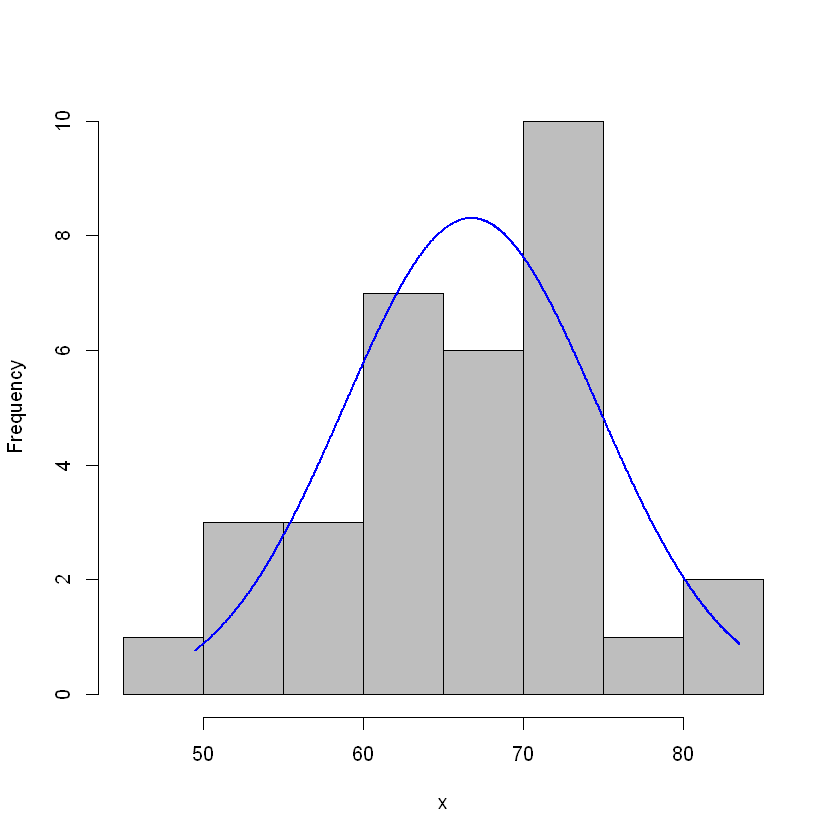

In [20]:
plotNormalHistogram(data2$Baseline.Body.Mass..kg.)
## looks approx normally distributed

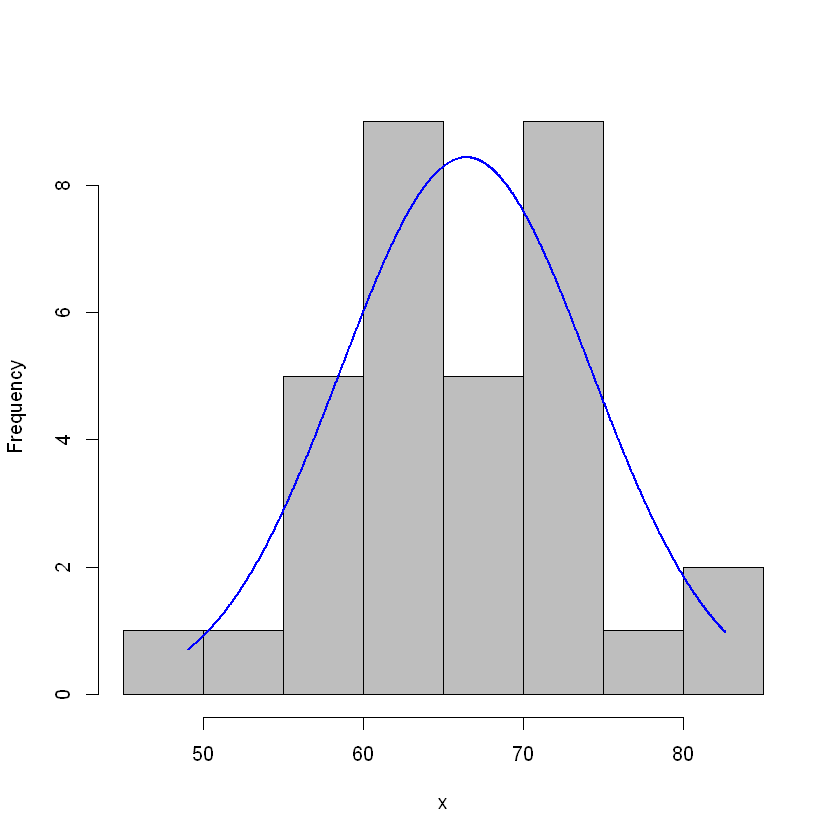

In [21]:
plotNormalHistogram(data2$Follow.Up.Body.Mass..kg.)
## same here

## Homogeneity of Variance

In [22]:
leveneTest(repdat ~ Treatment.Group*contrasts, data=data5)
## no significance, so data passes the assumption of homogeneity of variance

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,0.06231531,0.9794777
,62,NA,NA


In [23]:
str(data5)
## Pass assumption of sample size

'data.frame':	66 obs. of  7 variables:
 $ Participant.Code: int  2 4 11 14 16 19 20 23 27 34 ...
 $ Treatment.Group : chr  "Fasting" "Fasting" "Fasting" "Fasting" ...
 $ Age..y.         : int  27 25 44 36 28 38 48 54 27 22 ...
 $ Sex             : chr  "Female" "Female" "Male" "Female" ...
 $ Height..m.      : num  1.75 1.72 1.64 1.68 1.64 1.74 1.78 1.75 1.63 1.66 ...
 $ repdat          : num  71.5 74.6 68 57 49.4 64.3 66.5 73.5 59 67.1 ...
 $ contrasts       : chr  "T1" "T1" "T1" "T1" ...


## Analysis

In [24]:
RManova <- aov(repdat~contrasts+Error(Participant.Code), data5)
summary(RManova)


Error: Participant.Code
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  1  105.3   105.3               

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
contrasts  1      2    1.64   0.027  0.871
Residuals 63   3854   61.17               

In [25]:
## looks like there is no significant effect of time on weight